In [66]:
from functools import reduce

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 999)

%matplotlib notebook

In [93]:
train = pd.read_csv('../data/train.csv', index_col='PetID')

In [96]:
train = train.drop(['Name', 'RescuerID', 'Description'], axis=1)

In [97]:
def combine_multiples(categories):
    categories = [c for c in categories if c != 0]
    return reduce(lambda a, b: str(a) + '_' + str(b), sorted(categories))

In [98]:
train['Breed'] = train[['Breed1', 'Breed2']].apply(combine_multiples, axis=1)

In [99]:
train['Color'] = train[['Color1', 'Color2', 'Color3']].apply(combine_multiples, axis=1)

In [100]:
train = train.drop(['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3'], axis=1)

In [101]:
train.head()

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,Breed,Color
PetID,,,,,,,,,,,,,,,,,
86e1089a3,2,3,1,1,1,2,2,2,1,1,100,41326,0,1.0,2,299,1_7
6296e909a,2,1,1,2,2,3,3,3,1,1,0,41401,0,2.0,0,265,1_2
3422e4906,1,1,1,2,2,1,1,2,1,1,0,41326,0,7.0,3,307,2_7
5842f1ff5,1,4,2,2,1,1,1,2,1,1,150,41401,0,8.0,2,307,1_2
850a43f90,1,1,1,2,1,2,2,2,1,1,0,41326,0,3.0,2,307,1


In [103]:
category_cols = ['Type', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 
                 'Dewormed', 'Sterilized', 'Health', 'State', 'Color', 'Breed']

In [104]:
train[category_cols] = train[category_cols].astype('category')

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14993 entries, 86e1089a3 to a83d95ead
Data columns (total 17 columns):
Type             14993 non-null category
Age              14993 non-null int64
Gender           14993 non-null category
MaturitySize     14993 non-null category
FurLength        14993 non-null category
Vaccinated       14993 non-null category
Dewormed         14993 non-null category
Sterilized       14993 non-null category
Health           14993 non-null category
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null category
VideoAmt         14993 non-null int64
PhotoAmt         14993 non-null float64
AdoptionSpeed    14993 non-null int64
Breed            14993 non-null category
Color            14993 non-null category
dtypes: category(11), float64(1), int64(5)
memory usage: 1.6+ MB


In [106]:
train['PhotoAmt'] = train['PhotoAmt'].astype(int)

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14993 entries, 86e1089a3 to a83d95ead
Data columns (total 17 columns):
Type             14993 non-null category
Age              14993 non-null int64
Gender           14993 non-null category
MaturitySize     14993 non-null category
FurLength        14993 non-null category
Vaccinated       14993 non-null category
Dewormed         14993 non-null category
Sterilized       14993 non-null category
Health           14993 non-null category
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null category
VideoAmt         14993 non-null int64
PhotoAmt         14993 non-null int64
AdoptionSpeed    14993 non-null int64
Breed            14993 non-null category
Color            14993 non-null category
dtypes: category(11), int64(6)
memory usage: 1.6+ MB


<IPython.core.display.Javascript object>


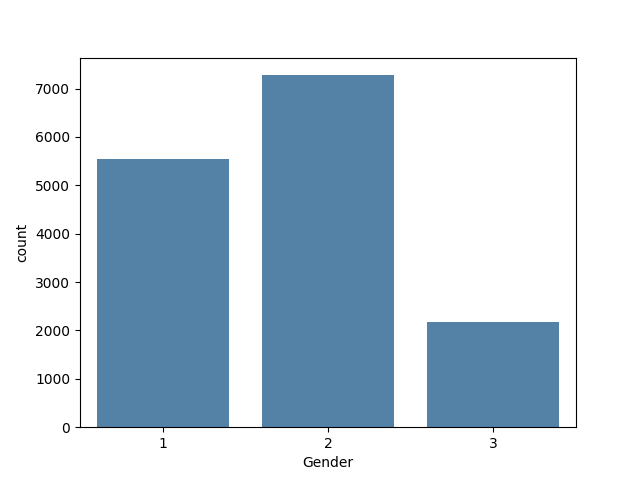

In [112]:
sns.countplot(x='Gender', data=train, color='steelblue')